In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np

from letalker import KinematicVocalFolds, SineGenerator, ModulatedSineGenerator
from letalker.constants import fs, male_vf_params, rho_air, c, vocaltract_areas, PL

N = 1000

t = np.arange(N) / fs

fo = 101

m_freq = 1 / 2
extent = 0.2

# sine = SineGenerator(fo)
# am_sine = ModulatedSineGenerator(fo, m_freq, am_extent=extent)
# fm_sine = ModulatedSineGenerator(fo, m_freq, fm_extent=extent)
amfm_sine = ModulatedSineGenerator(fo, m_freq, am_extent=extent, fm_extent=extent)

Ae = vocaltract_areas["aa"][0]
As = vocaltract_areas["trach"][-1]

In [2]:
vf = KinematicVocalFolds(
    amfm_sine, As=As, Ae=Ae, **male_vf_params, Qa=0.3, Qs=3, Qb=1, Qp=0.2
)

xi = vf.xi(1)*10
y = vf.y(N)*10
z = vf.z(N)*10

X = xi[0]
xmax = np.max(X) * 1.2

print(xi.shape, y.shape, z.shape)

Z, Y = np.meshgrid(z, y)

(21, 15) (1000, 21) (1000, 15)


In [3]:
print(male_vf_params)

{'L0': 1.42, 'T0': 0.3, 'fo2L': (4, 9.4), 'xim': 0.12}


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

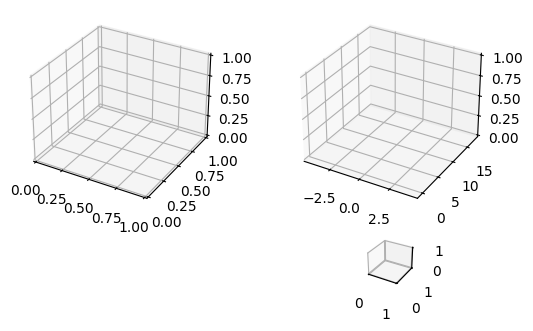

In [4]:
Lmax = vf.length(N).max() * 10

w = 6.4
h = w * 9 / 16

fig, axes = plt.subplot_mosaic(
    """tp
    .r""",
    height_ratios=[0.8, 0.2],
    width_ratios=[0.5, 0.5],
    subplot_kw={"projection": "3d"},
    figsize=[w, h],
)
ax = axes["p"]
ax.axis((-xmax, xmax, -0.1 * Lmax, Lmax * 1.2, 0, z[-1]))
ax.set_xlabel("$x$ (mm)")
ax.set_ylabel("$y$ (mm)")
ax.set_zlabel("$z$ (mm)")
ax.set_zticks([0, round(z[-1])])

# Plot a basic wireframe.
ax.plot_surface(X, Y, Z, edgecolors="k")  # inner wall

z0 = np.full_like(y, z[-1])
y0 = np.full_like(z, y[0])
ax.plot([X[0, -1], xmax], y[[0, 0]], z[[-1, -1]], "k", zorder=20.01)
ax.plot([X[0, 0], xmax], y[[0, 0]], z[[0, 0]], "k")
ax.plot([X[-1, 0], xmax], y[[-1, -1]], z[[0, 0]], "k")
ax.plot([X[-1, -1], xmax], y[[-1, -1]], z[[-1, -1]], "k")

from matplotlib.patches import Polygon
from mpl_toolkits.mplot3d.art3d import patch_2d_to_3d

p = Polygon(
    np.array([[*X[:, -1], xmax, xmax], [*y, y[-1], y[0]]]).T,
    closed=False,
    fc="none",
    ec="k",
)
patch_2d_to_3d(
    p,
    z[-1],
    "z",
)
ax.add_patch(p)
ax.plot_surface(-X, Y, Z, edgecolors="k")
ax.plot([-X[0, -1], -xmax], y[[0, 0]], z[[-1, -1]], "k", zorder=20.01)
ax.plot([-X[0, 0], -xmax], y[[0, 0]], z[[0, 0]], "k")
ax.plot([-X[-1, 0], -xmax], y[[-1, -1]], z[[0, 0]], "k")
ax.plot([X[-1, -1], -xmax], y[[-1, -1]], z[[-1, -1]], "k")
ax.view_init(22.5, -70)

ax.set_aspect("equal")
# ax.set_box_aspect(aspect = (2,2,2))

ax = axes["t"]
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.axis((-xmax, xmax, -0.1 * Lmax, Lmax * 1.2, 0, z[-1]))
ax.view_init(90, -90)
ax.set_proj_type("ortho")

ax = axes["r"]
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.axis((-xmax, xmax, -0.1 * Lmax, Lmax * 1.2, 0, z[-1]))
ax.view_init(0, -90)
ax.set_proj_type("ortho")

fig.savefig("test.png")